# LIME
Explainable AI: Comparing LIME and SHAP Explanations (With vs Without Standardization)
Introduction to Local Explanation Methods
While global feature importance (like SVC weights) provides overall model behavior, we often need local explanations for individual predictions. Two popular methods are:

LIME (Local Interpretable Model-agnostic Explanations)

Approximates complex model locally with an interpretable model

Good for explaining single predictions

SHAP (SHapley Additive exPlanations)

Based on game theory to fairly distribute feature contributions

Provides both local and global explanations

Let's apply both to our SVC model with and without standardization.

If you have never used lime or shap, you will have to install both first:

In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Import additional required libraries
import lime
import lime.lime_tabular
import shap
from shap import KernelExplainer, Explanation
from shap.plots import force, waterfall

# Set random seeds for reproducibility
np.random.seed(42)

/home/nnieto/Nico/Cursos/.courses/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# Load and prepare the Iris dataset (binary classification)
iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Keep only two classes (setosa vs versicolor)
X = X[y != 2]
y = y[y != 2]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

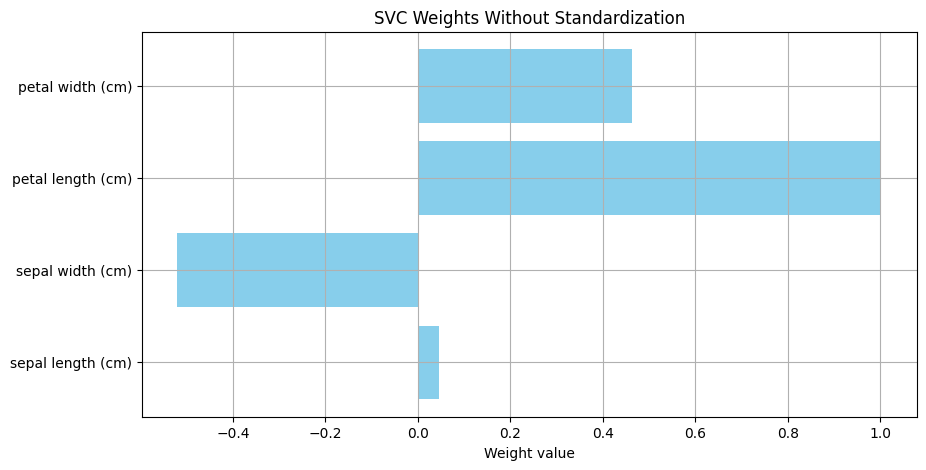

Raw data - Training accuracy: 1.00
Raw data - Test accuracy: 1.00


In [5]:
# Train SVC on raw (unscaled) data
svc_raw = SVC(kernel='linear', C=1.0, random_state=42, probability=True)
svc_raw.fit(X_train, y_train)

# Plot weights
plt.figure(figsize=(10, 5))
weights_raw = svc_raw.coef_[0]
plt.barh(feature_names, weights_raw, color='skyblue')
plt.xlabel('Weight value')
plt.title('SVC Weights Without Standardization')
plt.grid(True)
plt.show()

# Print performance
print(f"Raw data - Training accuracy: {svc_raw.score(X_train, y_train):.2f}")
print(f"Raw data - Test accuracy: {svc_raw.score(X_test, y_test):.2f}")

<Figure size 800x400 with 0 Axes>

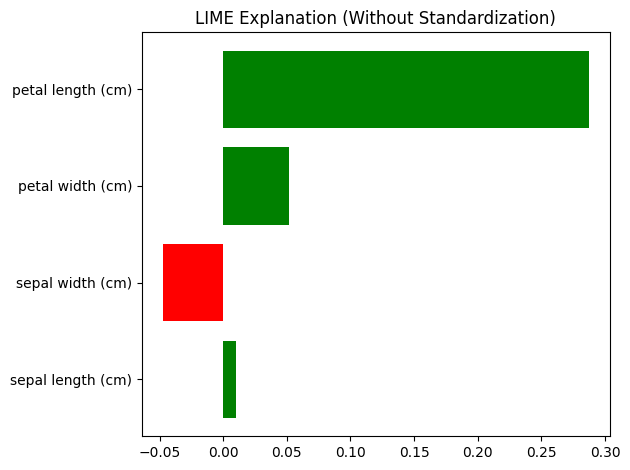

In [6]:
# Initialize LIME explainer
explainer_lime_raw = lime.lime_tabular.LimeTabularExplainer(
    X_train,
    feature_names=feature_names,
    class_names=target_names[:2],
    mode='classification',
    discretize_continuous=False
)

# Explain an instance from test set
instance_idx = 0
exp_raw = explainer_lime_raw.explain_instance(
    X_test[instance_idx],
    svc_raw.predict_proba,
    num_features=4
)

# Plot LIME explanation
plt.figure(figsize=(8, 4))
exp_raw.as_pyplot_figure()
plt.title("LIME Explanation (Without Standardization)")
plt.tight_layout()
plt.show()

## Does it make sense to use LIME as done in the example for the SVC? Why/Why not?
### Use LIME to get model interpretations for a model setup that makes sense in your opinion (hint: If you are completely clueless we can discuss in the next consultation hour)

<Figure size 800x400 with 0 Axes>

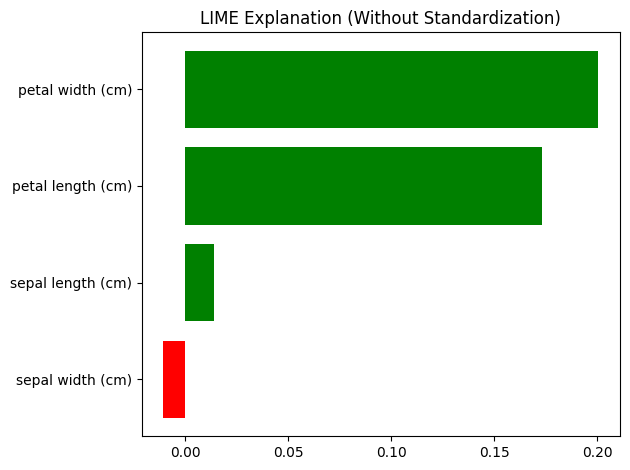

In [24]:
from sklearn.ensemble import RandomForestClassifier

# Train SVC on raw (unscaled) data
rf_raw = RandomForestClassifier()
rf_raw.fit(X_train, y_train)

# Initialize LIME explainer
explainer_lime_raw = lime.lime_tabular.LimeTabularExplainer(
    X_train,
    feature_names=feature_names,
    class_names=target_names[:2],
    mode='classification',
    discretize_continuous=False
)

# Explain an instance from test set
instance_idx = 20
exp_raw = explainer_lime_raw.explain_instance(
    X_test[instance_idx],
    rf_raw.predict_proba,
    num_features=4
)

# Plot LIME explanation
plt.figure(figsize=(8, 4))
exp_raw.as_pyplot_figure()
plt.title("LIME Explanation (Without Standardization)")
plt.tight_layout()
plt.show()

<Figure size 800x400 with 0 Axes>

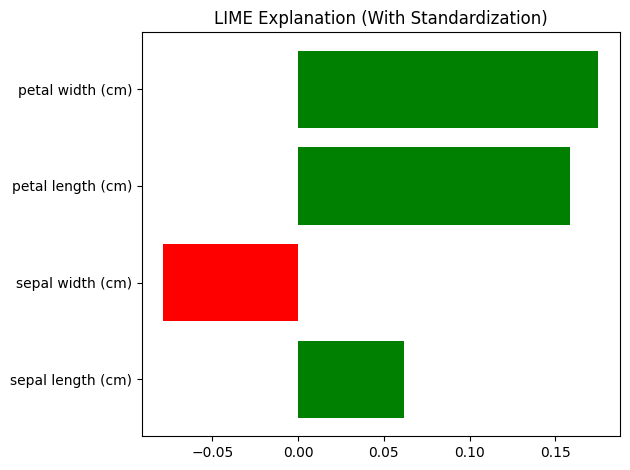

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


svc_scaled = SVC(probability=True, kernel="linear")
svc_scaled.fit(X_train_scaled, y_train)
# Initialize LIME explainer for standardized data
explainer_lime_scaled = lime.lime_tabular.LimeTabularExplainer(
    X_train_scaled,
    feature_names=feature_names,
    class_names=target_names[:2],
    mode='classification',
    discretize_continuous=False
)

# Explain same instance (now standardized)
exp_scaled = explainer_lime_scaled.explain_instance(
    X_test_scaled[instance_idx],
    svc_scaled.predict_proba,
    num_features=4
)

# Plot LIME explanation
plt.figure(figsize=(8, 4))
exp_scaled.as_pyplot_figure()
plt.title("LIME Explanation (With Standardization)")
plt.tight_layout()
plt.show()

# Check the difference between a logistic regression and a tree-based algo with respect the standarization.
## Does it affect the same to the model?